## Demonstration of the GroebnerWalk package

This is a demonstration of the functionality of the OSCAR function groebner_walk. It is contained in the latest OSCAR version under "experimental". 

## Baby steps 

Let us perform some Gröbner basis computations on the ideal $$I = \langle x^2 + yz \ , \  xy + z^2 \rangle \triangleleft \mathbb{Q}[x,y,z]$$
We start by loading OSCAR: 



In [1]:
using Oscar

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.3.0


We then define the ideal, and perform a first Gröbner basis computation to compile the groebner_basis function. 

In [2]:
R, (x,y,z) = polynomial_ring(QQ, ["x", "y", "z"]) #define the ring

I = ideal([x^2 + y*z, x*y + z^2]) #define the ideal
 
groebner_basis(I) #computes a degree reverse lexicographic Gröbner basis

Gröbner basis with elements
  1: x*y + z^2
  2: x^2 + y*z
  3: y^2*z - x*z^2
with respect to the ordering
  degrevlex([x, y, z])

We may compute a lexicographic basis of I w.r.t the lexicographic ordering by calling "groebner_walk(I)"

In [3]:
groebner_walk(I)

Gröbner basis with elements
  1: x*y + z^2
  2: x^2 + y*z
  3: x*z^2 - y^2*z
  4: y^3*z + z^4
with respect to the ordering
  lex([x, y, z])

More information on the intermediate steps can be obtained by modifying the value of set_verbosity_level. 

In [4]:
set_verbosity_level(:groebner_walk, 1)
groebner_walk(I)

Results for standard_walk
Crossed Cones in: 
ZZRingElem[1, 1, 1]
Cones crossed: 1


Gröbner basis with elements
  1: x*y + z^2
  2: x^2 + y*z
  3: x*z^2 - y^2*z
  4: y^3*z + z^4
with respect to the ordering
  lex([x, y, z])

The starting and target orderings may be specified by two additional arguments. The steps of the Gröbner walk change accordingly. 

In [5]:
start_order = lex(R)

target_order = matrix_ordering(R, [1 3 0; 1 1 1; 1 0 0 ])

G_target = groebner_walk(I, target_order, start_order)


Results for standard_walk
Crossed Cones in: 
ZZRingElem[1, 0, 0]
ZZRingElem[2, 1, 0]
ZZRingElem[1, 2, 0]
Cones crossed: 3


Gröbner basis with elements
  1: y*z + x^2
  2: x^3 - z^3
  3: x*y + z^2
with respect to the ordering
  matrix_ordering([x, y, z], [1 3 0; 1 1 1; 1 0 0])

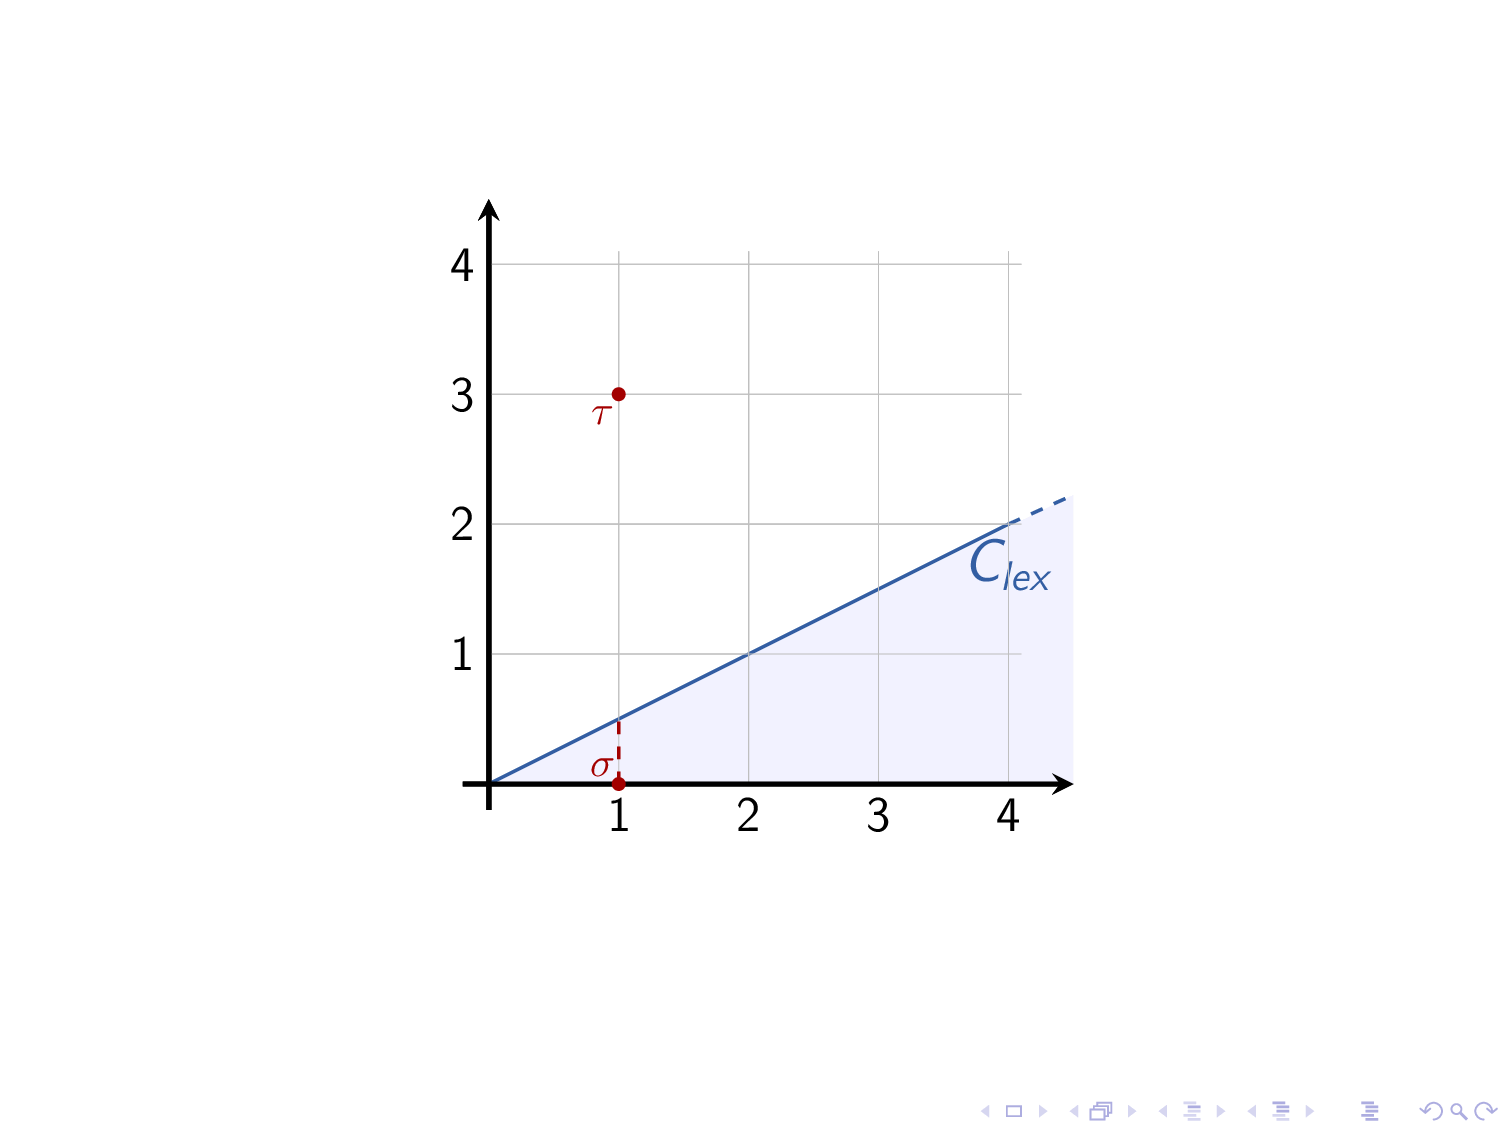

The specific choice of walk may be specified by the optional "algorithm" keyword argument.

In [6]:
groebner_walk(I, target_order, start_order, algorithm = :generic)

Results for generic_walk
Facets crossed for: 
ZZRingElem[1, -2, 1]
ZZRingElem[2, -1, -1]
Cones crossed: 2


Gröbner basis with elements
  1: y*z + x^2
  2: x^3 - z^3
  3: x*y + z^2
with respect to the ordering
  matrix_ordering([x, y, z], [1 3 0; 1 1 1; 1 0 0])

# Larger examples

Now assume we are tasked with computing a lexicographic Gröbner basis of the ideal 

$$I = \langle 6 + 3x^3+16x^2z+14x^2y^3 \ , \ 6+y^3z+17x^2z^2+7xy^2z^2+13x^3z^2 \rangle$$.

An approach involving groebner_basis doesn't terminate on this machine due to memory overload! 

Let us try a Groebner walk... 


In [7]:
I = ideal([6 + 3*x^3+16*x^2*z+14*x^2*y^3, 6+y^3*z+17*x^2*z^2+7*x*y^2*z^2+13*x^3*z^2])
G = groebner_walk(I) 

Results for standard_walk
Crossed Cones in: 
ZZRingElem[1, 1, 1]
ZZRingElem[5, 2, 2]
ZZRingElem[3, 1, 1]
ZZRingElem[9, 2, 2]
ZZRingElem[5, 1, 1]
ZZRingElem[6, 1, 1]
ZZRingElem[7, 1, 1]
ZZRingElem[8, 1, 1]
ZZRingElem[9, 1, 1]
ZZRingElem[10, 1, 1]
ZZRingElem[11, 1, 1]
ZZRingElem[13, 1, 1]
ZZRingElem[14, 1, 1]
ZZRingElem[15, 1, 1]
ZZRingElem[16, 1, 1]
Cones crossed: 15


Gröbner basis with elements
  1: y^15*z^4 + 24//7*y^12*z^5 - 51//182*y^12*z^4 + 12*y^12*z^3 + 9//364*y^11*z^4 + 21*y^10*z^6 + 192//49*y^9*z^6 - 9690//637*y^9*z^5 + 288//7*y^9*z^4 - 119979//35672*y^9*z^3 + 36*y^9*z^2 + 855//1274*y^8*z^5 + 27//91*y^8*z^3 + 48*y^7*z^7 - 153//26*y^7*z^6 + 512//343*y^6*z^7 - 591315//17836*y^6*z^6 + 32553//637*y^6*z^5 - 1695411//17836*y^6*z^4 + 864//7*y^6*z^3 - 180171//17836*y^6*z^2 - 1602//49*y^5*z^6 - 1377//2548*y^5*z^5 + 2673//637*y^5*z^4 + 81//91*y^5*z^2 + 192//7*y^4*z^8 - 612//91*y^4*z^7 - 6528//343*y^3*z^7 + 337371//4459*y^3*z^6 - 37449//182*y^3*z^5 + 15066//91*y^3*z^4 - 99657//4459*y^3*z^3 - 729//8918*y^3*z - 1872//49*y^2*z^7 + 1377//98*y^2*z^6 + 216//49*y^2*z^5 - 4131//1274*y^2*z^4 + 648//637*y^2*z^3 + 20808//343*z^7 - 21069//182*z^6 + 364464//4459*z^5 - 99819//4459*z^4 + 729//343*z^2 - 729//4459
  2: 22538763217948221777736637231220538077975055680*x*y^6 + 4571527896234729872300263727064711543860143173//52*x*y^5*z + 1740341611170424965095546116401555

In [8]:
is_groebner_basis(G, ordering = lex(R))

true

Here are some selected benchmarks. 
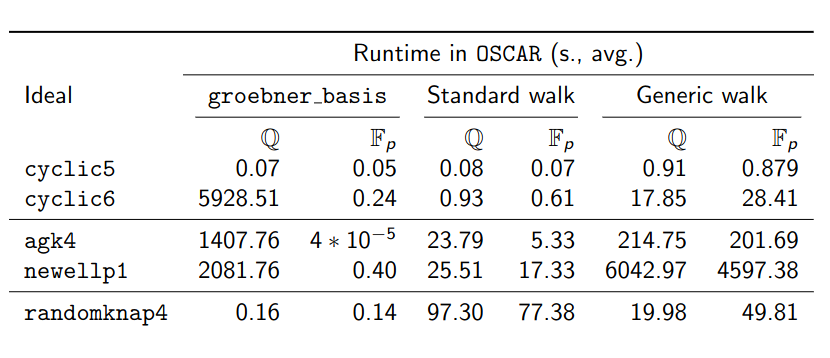


Our package provides additional information about the walk which may be useful, e.g. for visualizations! 

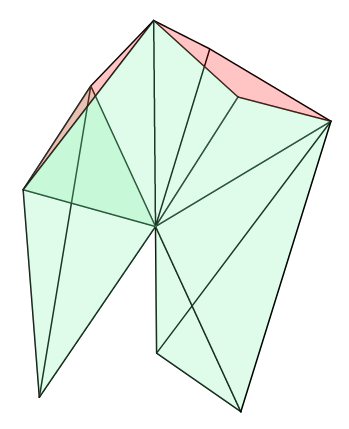


